<목차>
---
1. 인공신경망의 등장 배경
2. Perceptron
3. 다층 퍼셉트론 MLP
4. 오류역전파 알고리즘
5. ANN을 이용한 MNIST 숫자 분류기 구현

# 1. 인공신경망의 등장 배경
---
인간의 뇌처럼 대량의 병렬 처리 연산을 수행하도록 만든 구조

# 2. Perceptron
---
- **퍼셉트론의 구조**  
y = σ(Wx = b) *(σ: 활성함수)*  
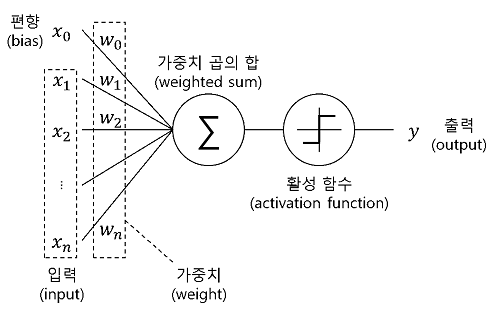  
- 입력값을 받으면 2개의 출력값 중 하나를 출력해내는 **선형 이진 분류기**  
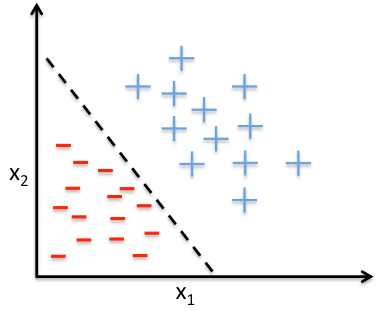  

# 3. Multi-Layer Perceptron (=ANN)
---
선형 분리가 불가능한 문제도 해결 가능  
비선형적인 특징을 학습할 수 있도록 만드는 것이 목적
- **MLP의 구조**  
하나의 노드에서 퍼셉트론 구조와 같은 연산을 수행  
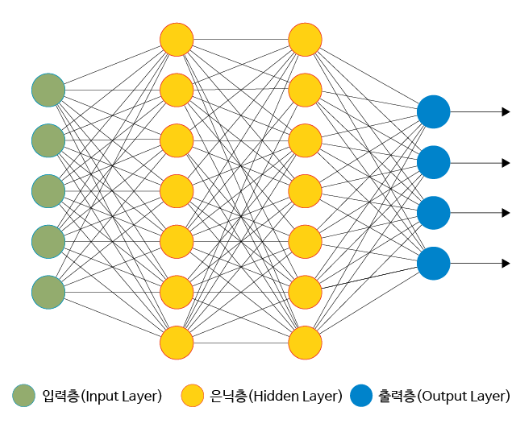  
- **활성 함수**  
  -  sigmoid  
    - 입력값이 -6 이하 혹은 6 이상에서 그래프의 미분값이 0이 되는 문제 발생
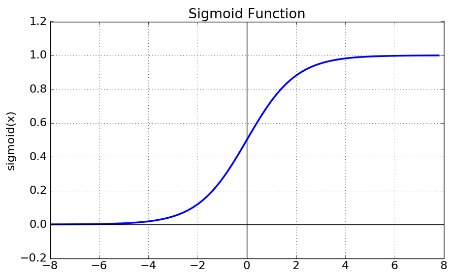
  -  tanh   
    - 입력값이 -2 이하 혹은 2 이상에서 그래프의 미분값이 0이 되는 문제 발생  
    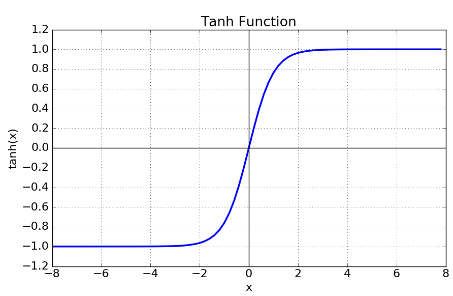

  -  ReLU
    - 0보다 클 경우 아무리 커져도 미분값이 1인 상태가 유지되어 Vanishing Gradient 문제가 발생할 확률 적음  
    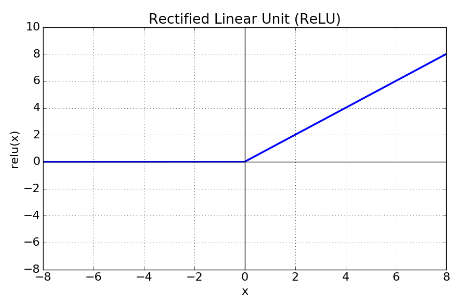

# 4. Backpropagation Algorithm
---
- **수행 순서**  
1) training data를 입력층에 넣어서 전방향 연산 수행  
2) 결과로 나온 MLP의 예측값과 실제값의 차이인 error 계산  
3) error를 MLP의 각각의 노드들에 역전파

- **MLP 구조에서 수행**  
1) input data를 받고 forward-propagate를 수행해서 은닉층, 출력층까지 노드들의 activation을 계산  
2) 출력층의 각각의 노드에 대해서 에러값 계산  
3) 출력층을 제외한 다른 층의 각각의 노드에 대해서 에러값 계산  
4) MLP의 파라미터에 대한 미분값(derivative)을 계산



# 5. ANN을 이용한 MNIST 숫자 분류기 구현
---

In [ ]:
#버전1
#!pip install tensorflow==1.2
import tensorflow as tf

데이터 다운로드

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


학습을 위한 설정값 정의

In [13]:
learning_rate = 0.001
num_epochs = 30 #학습횟수
batch_size = 256 #배치개수
display_step = 1 #손실 함수 출력 주기
input_size = 784 
hidden1_size = 256
hidden2_size = 256
output_size = 10

In [21]:
# 입력값과 출력값 받기
x = tf.placeholder(tf.float32, shape=[None, input_size])
y = tf.placeholder(tf.float32, shape=[None, output_size])

# ANN 모델을 정의
def build_ANN(x):
  W1 = tf.Variable(tf.random_normal(shape=[input_size, hidden1_size]))
  b1 = tf.Variable(tf.random_normal(shape=[hidden1_size]))
  H1_output = tf.nn.relu(tf.matmul(x,W1) + b1)
  W2 = tf.Variable(tf.random_normal(shape=[hidden1_size, hidden2_size]))
  b2 = tf.Variable(tf.random_normal(shape=[hidden2_size]))
  H2_output = tf.nn.relu(tf.matmul(H1_output,W2) + b2)
  W_output = tf.Variable(tf.random_normal(shape=[hidden2_size, output_size]))
  b_output = tf.Variable(tf.random_normal(shape=[output_size]))
  logits = tf.matmul(H2_output,W_output) + b_output

  return logits

# ANN 모델을 선언
predicted_value = build_ANN(x)

# 손실함수와 옵티마이저를 정의
# 활성함수를 적용하지 않은 output layer의 결과값(logits)에 softmax 함수를 적용
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predicted_value, labels=y))
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# 그래프 실행
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for epoch in range(num_epochs):
    average_loss = 0.

    #전체 배치 불러오기
    total_batch = int(mnist.train.num_examples / batch_size)

    #모든 배치들에 대해서 최적화 수행
    for i in range(total_batch):
      batch_x, batch_y = mnist.train.next_batch(batch_size)
      #파라미터 업데이트
      _, current_loss = sess.run([train_step, loss], feed_dict={x:batch_x, y:batch_y})
      #평균 손실 측정
      average_loss += current_loss / total_batch

    #epoch마다 학습결과 출력
    if epoch % display_step == 0:
      print("반복: %d, 손실 함수: %f" % ((epoch+1), average_loss))

  #test 데이터 적용
  correct_prediction = tf.equal(tf.argmax(predicted_value, 1), tf.argmax(y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  print("정확도: %f" % (accuracy.eval(feed_dict={x:mnist.test.images, y:mnist.test.labels})))

반복: 1, 손실 함수: 301.375973
반복: 2, 손실 함수: 65.775815
반복: 3, 손실 함수: 42.730985
반복: 4, 손실 함수: 31.755790
반복: 5, 손실 함수: 24.846026
반복: 6, 손실 함수: 19.852744
반복: 7, 손실 함수: 16.098761
반복: 8, 손실 함수: 13.417629
반복: 9, 손실 함수: 10.985498
반복: 10, 손실 함수: 9.335082
반복: 11, 손실 함수: 7.630779
반복: 12, 손실 함수: 6.657420
반복: 13, 손실 함수: 5.525883
반복: 14, 손실 함수: 4.381189
반복: 15, 손실 함수: 3.764635
반복: 16, 손실 함수: 3.016626
반복: 17, 손실 함수: 2.602710
반복: 18, 손실 함수: 2.113991
반복: 19, 손실 함수: 1.751326
반복: 20, 손실 함수: 1.438124
반복: 21, 손실 함수: 1.205536
반복: 22, 손실 함수: 1.089518
반복: 23, 손실 함수: 0.783238
반복: 24, 손실 함수: 0.651737
반복: 25, 손실 함수: 0.522300
반복: 26, 손실 함수: 0.471323
반복: 27, 손실 함수: 0.420289
반복: 28, 손실 함수: 0.299357
반복: 29, 손실 함수: 0.275309
반복: 30, 손실 함수: 0.269821
정확도: 0.940100


**개선된 옵티마이저**  
AdamOptimizer / RMSPropOptimizer / AdadeltaOptimizer / AdagradOptimizer / MomentumOptimizer